🌳 DFS Traversal (graphical):


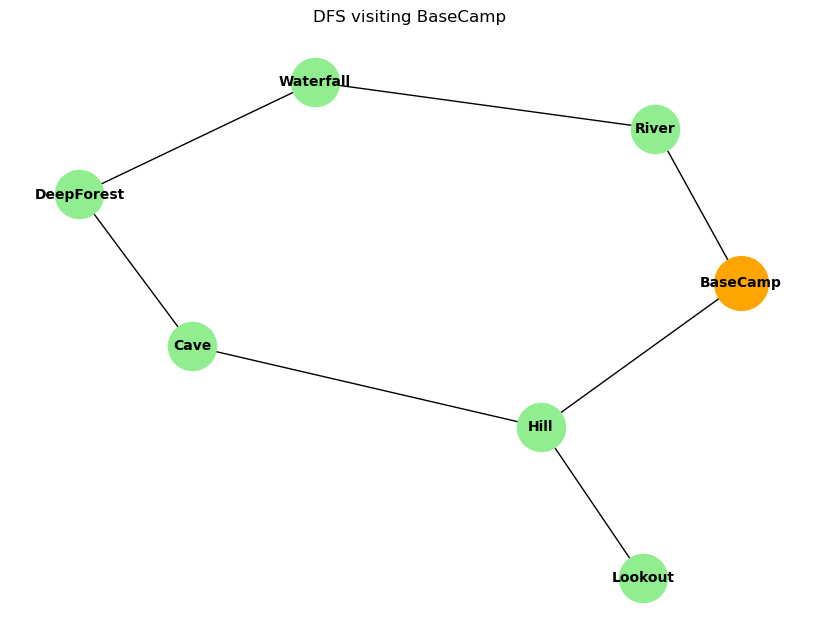

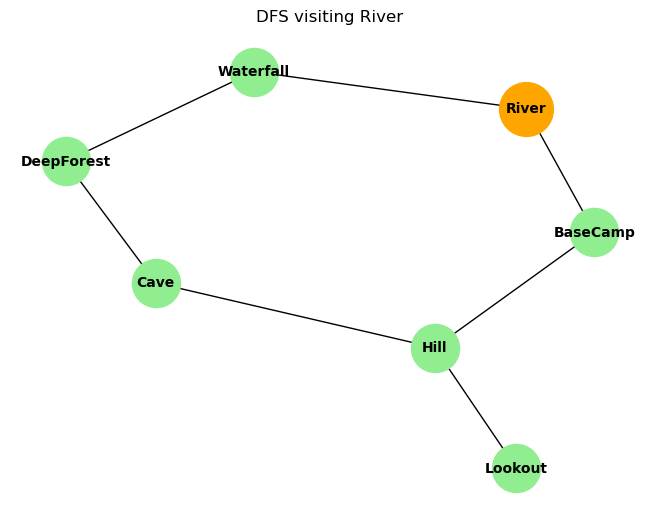

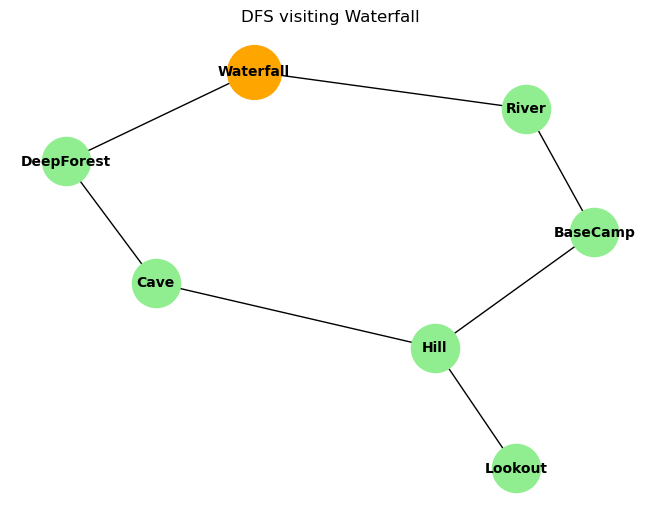

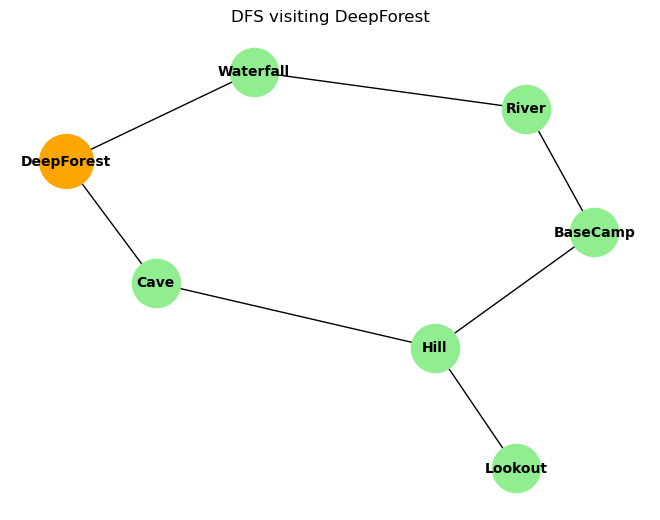

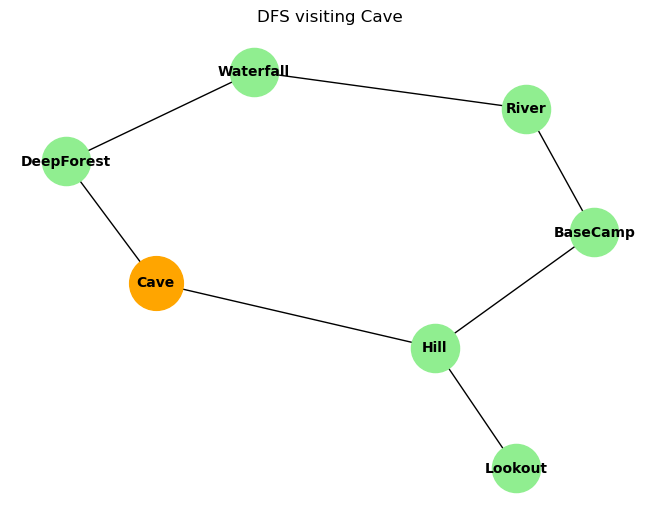

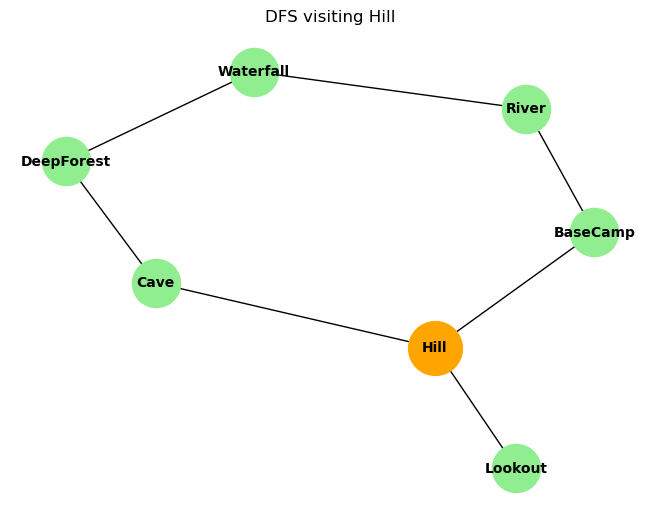

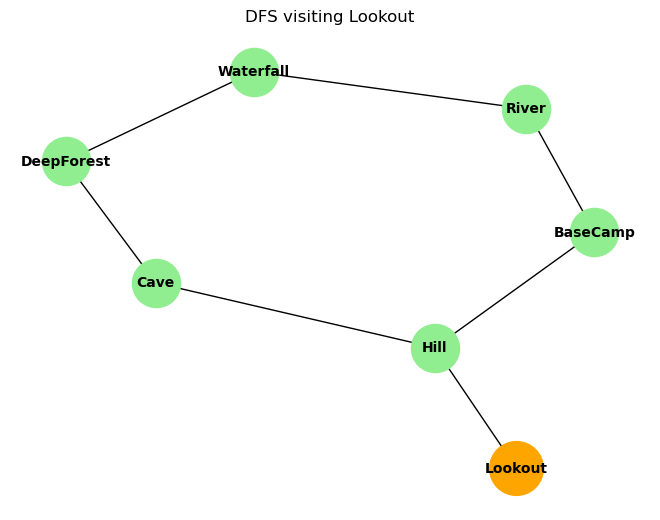


🌳 BFS Traversal (graphical):


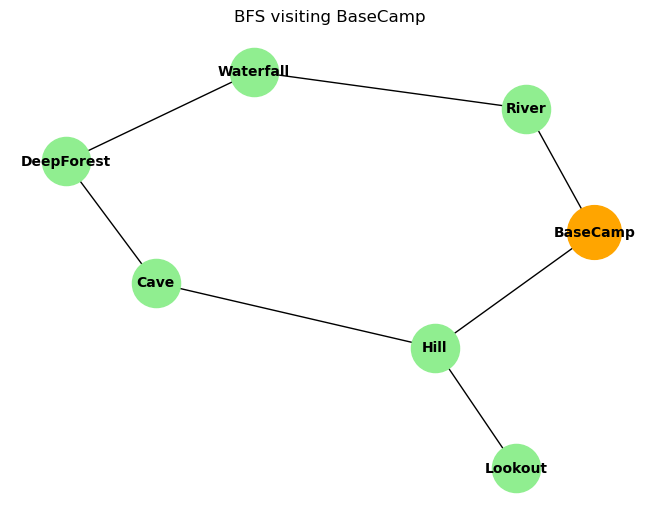

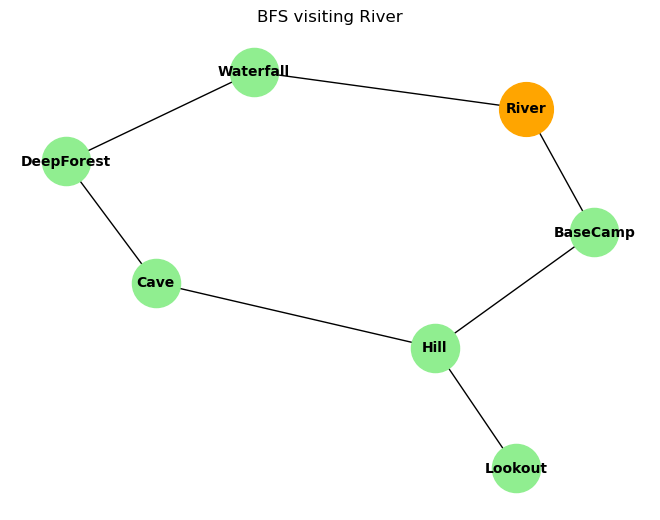

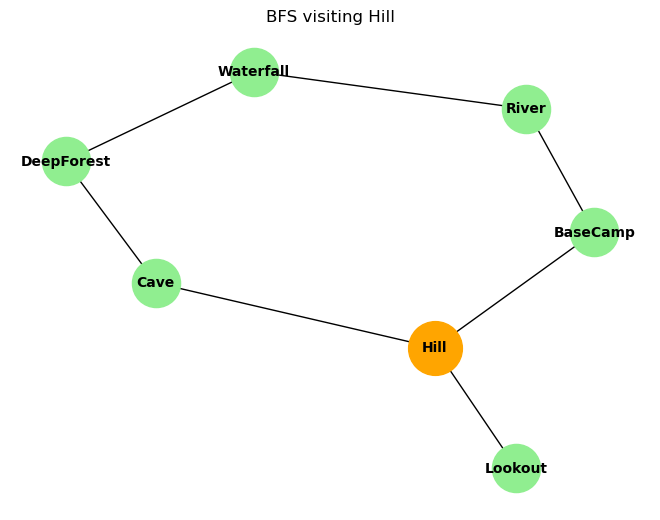

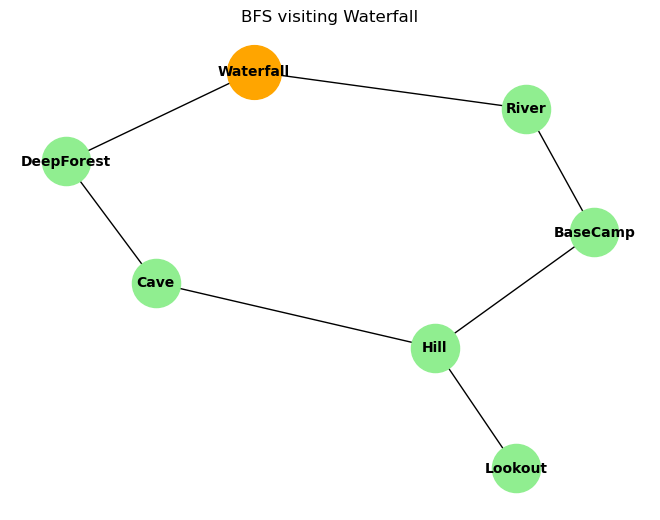

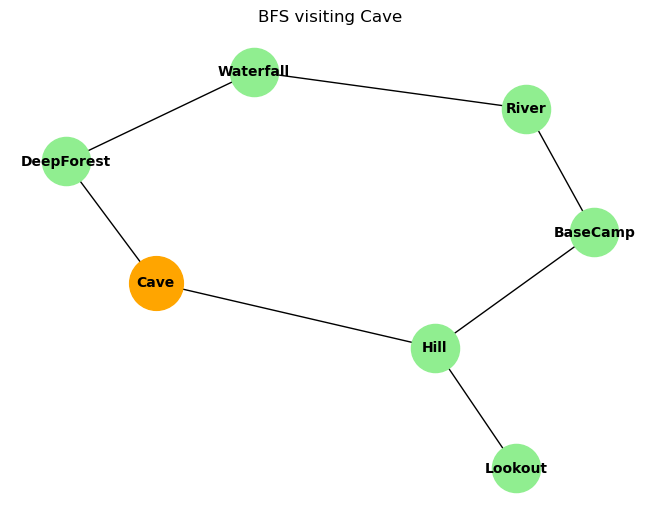

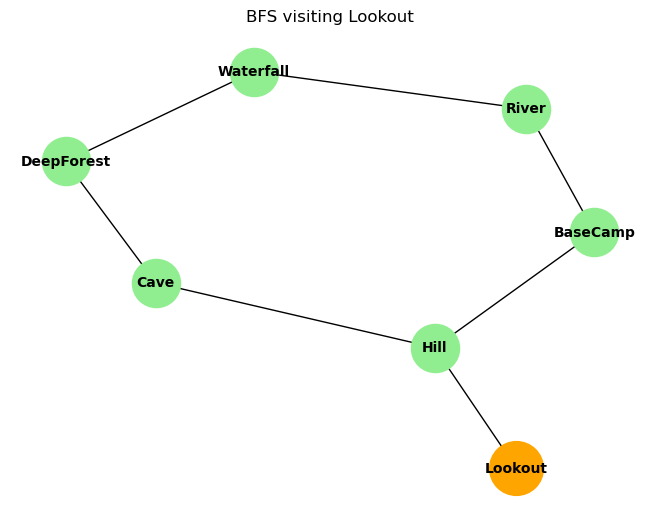

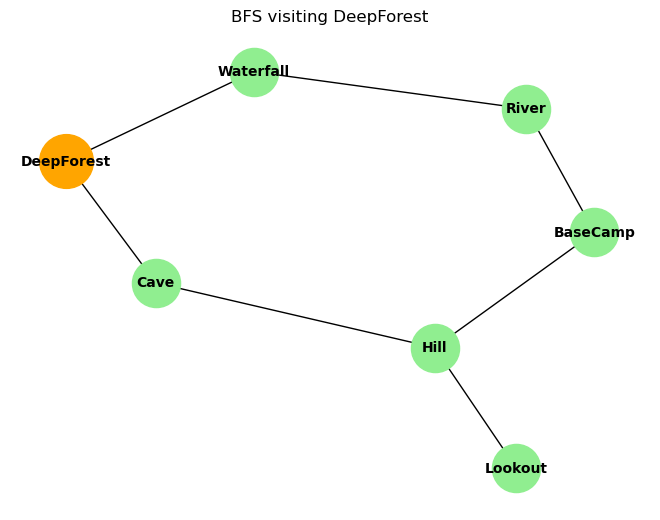


🏞 Shortest path from BaseCamp to DeepForest: BaseCamp -> River -> Waterfall -> DeepForest


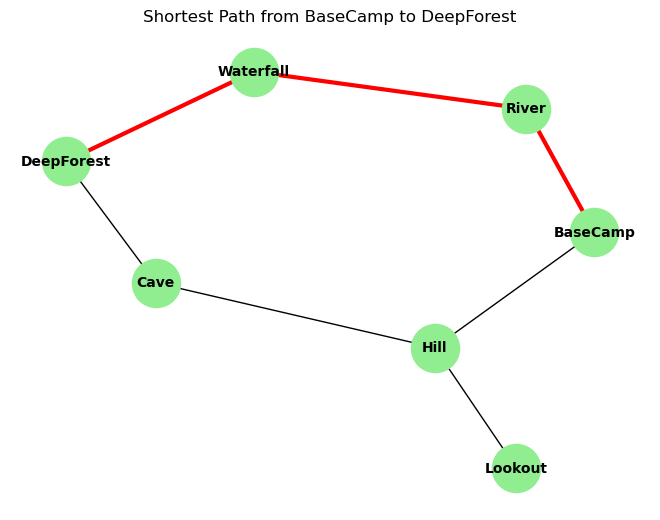

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time
from IPython.display import display

# -----------------------------
# Create an undirected graph
# -----------------------------
G = nx.Graph()

edges = [
    ("BaseCamp", "River"),
    ("BaseCamp", "Hill"),
    ("River", "Waterfall"),
    ("Hill", "Cave"),
    ("Cave", "DeepForest"),
    ("Waterfall", "DeepForest"),
    ("Hill", "Lookout")
]
G.add_edges_from(edges)

# Fixed layout for consistent visualization
pos = nx.spring_layout(G, seed=42)

# -----------------------------
# Draw graph function
# -----------------------------
def draw_graph(highlight_nodes=None, path_edges=None, title="Forest Exploration"):
    """Draw forest graph with highlighted nodes and shortest path edges"""
    plt.clf()
    nx.draw(G, pos, with_labels=True, node_size=1200, node_color="lightgreen", font_size=10, font_weight="bold")
    if highlight_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=highlight_nodes, node_color="orange", node_size=1500)
    if path_edges:
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=3)
    plt.title(title)
    display(plt.gcf())
    plt.close()

# -----------------------------
# DFS Recursive Traversal
# -----------------------------
visited_dfs = set()

def dfs_recursive(node):
    if node not in visited_dfs:
        visited_dfs.add(node)
        draw_graph(highlight_nodes=[node], title=f"DFS visiting {node}")
        for neighbor in G.neighbors(node):
            dfs_recursive(neighbor)

# -----------------------------
# BFS Traversal
# -----------------------------
def bfs(start):
    visited = set([start])
    queue = deque([start])
    while queue:
        node = queue.popleft()
        draw_graph(highlight_nodes=[node], title=f"BFS visiting {node}")
        for neighbor in G.neighbors(node):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

# -----------------------------
# BFS Shortest Path
# -----------------------------
def bfs_shortest_path(start, goal):
    visited = set([start])
    queue = deque([start])
    parent = {start: None}

    while queue:
        node = queue.popleft()
        if node == goal:
            break
        for neighbor in G.neighbors(node):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = node
                queue.append(neighbor)

    # Reconstruct path from start → goal
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = parent[current]
    path.reverse()
    return path

# -----------------------------
# Convert path to edges for visualization
# -----------------------------
def path_to_edges(path):
    return [(path[i], path[i+1]) for i in range(len(path)-1)]

# -----------------------------
# Run Visualizations
# -----------------------------
plt.figure(figsize=(8,6))

print("🌳 DFS Traversal (graphical):")
dfs_recursive("BaseCamp")

time.sleep(1)
visited_dfs.clear()

print("\n🌳 BFS Traversal (graphical):")
bfs("BaseCamp")

# -----------------------------
# Shortest Path Visualization
# -----------------------------
shortest = bfs_shortest_path("BaseCamp", "DeepForest")
print("\n🏞 Shortest path from BaseCamp to DeepForest:", " -> ".join(shortest))

edges_in_path = path_to_edges(shortest)
draw_graph(path_edges=edges_in_path, title="Shortest Path from BaseCamp to DeepForest")
